In [3]:
# 문제를 인식 -> 데이터 수집 > 전ㄴ처리 > 모델을 학습 > web app > deploy(배포) keras.js, tensorflow.js
    
# keras tf의 하위 서브모듈
from tensorflow.keras.models import Sequential # Functional , Model class
from tensorflow.keras.layers import Dense  # fully - connected

import numpy as np 
import tensorflow as tf # wrapper 보자기로 감쌈 > 복잡한 것을 숨기기 위해 

np.random.seed(3) 
tf.random.set_seed(3) # 랜덤값 초기화

Data_set = np.loadtxt("./dataset/ThoraricSurgery.csv", delimiter=",")

X = Data_set[:,0:17] # 독립변수
Y = Data_set[: ,17] # 종속변수

model = Sequential()
model.add(Dense(30 , input_dim=17 , activation='relu'))
# ? x 30 30 x 1 ? x 1
model.add(Dense(1,activation='sigmoid'))
# 0 ~ 1 사이의 값으로 출력 0.5보다 크면 1 , 0.5보다 작으면 0
model.compile(loss='binary_crossentropy', optimizer = 'adam' , metrics=['accuracy'])
model.fit(X,Y ,epochs = 100 , batch_size = 10)

Epoch 1/100
47/47 [==============================] - 0s 524us/step - loss: 0.6482 - accuracy: 0.8128
Epoch 2/100
47/47 [==============================] - 0s 532us/step - loss: 0.4890 - accuracy: 0.8468
Epoch 3/100
47/47 [==============================] - 0s 597us/step - loss: 0.4416 - accuracy: 0.8511
Epoch 4/100
47/47 [==============================] - 0s 617us/step - loss: 0.4863 - accuracy: 0.8489
Epoch 5/100
47/47 [==============================] - 0s 612us/step - loss: 0.4430 - accuracy: 0.8532
Epoch 6/100
47/47 [==============================] - 0s 674us/step - loss: 0.4303 - accuracy: 0.8532
Epoch 7/100
47/47 [==============================] - 0s 656us/step - loss: 0.4421 - accuracy: 0.8511
Epoch 8/100
47/47 [==============================] - 0s 658us/step - loss: 0.4363 - accuracy: 0.8489
Epoch 9/100
47/47 [==============================] - 0s 672us/step - loss: 0.4165 - accuracy: 0.8489
Epoch 10/100
47/47 [==============================] - 0s 695us/step - loss: 0.4317 - accura

In [9]:
model.summary() # 17 x 30 = 510 가중치 bias 30 = 540
30x 1 + 1(bias)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 별도 패키지로 
import keras.backend as K
import numpy as np 
np.random.seed(42)

x = np.random.rand(3,3)
y = np.random.rand(3,2)

x_var = K.variable(value=x)
y_var = K.variable(value=y)
xy = K.dot(x_var, y_var) # run 이 없이도 작업이 가능

matrix_product = K.eval(xy) 
matrix_product





array([[1.3427397 , 0.9322196 ],
       [0.60834146, 0.17056336],
       [1.0088804 , 0.8315352 ]], dtype=float32)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./dataset/pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"]) 

print(df.head(5))



   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [15]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


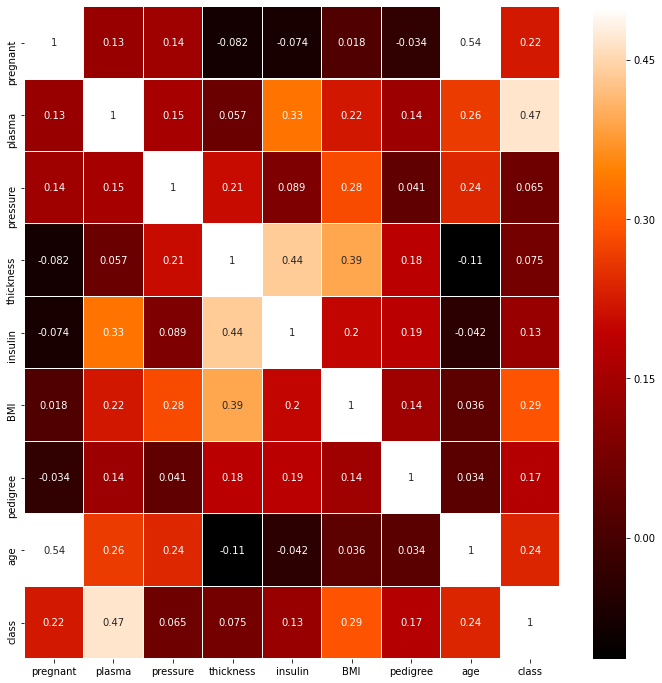

In [17]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths = 0.1 , vmax=0.5, cmap=colormap, linecolor = 'white', annot=True)
plt.show()

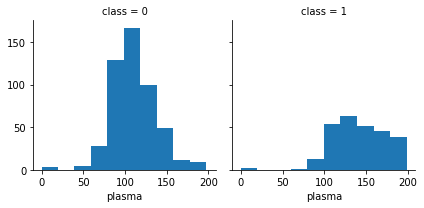

In [19]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

In [28]:
# 임신회수당 당뇨병 발병 확률을 구하시오 ( 데이터 요약 기능)

df[['pregnant','class']].groupby(['pregnant'], as_index = False).mean().sort_values(by='pregnant' , ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import numpy 
import tensorflow as tf 
numpy.random.seed(3)
tf.random.set_seed(3)
dataset = numpy.loadtxt("./dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8] # 배열식 iloc, loc
Y = dataset[: , 8]
model = Sequential()
model.add(Dense(12,input_dim=8, activation='relu')) #8 x 12
model.add(Dense(8, activation='relu')) # 12 x 8
model.add(Dense(1, activation='sigmoid')) # 8 x 1 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,Y,epochs=100,batch_size=10)


 

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, to_file='network.png')
model.get_config()

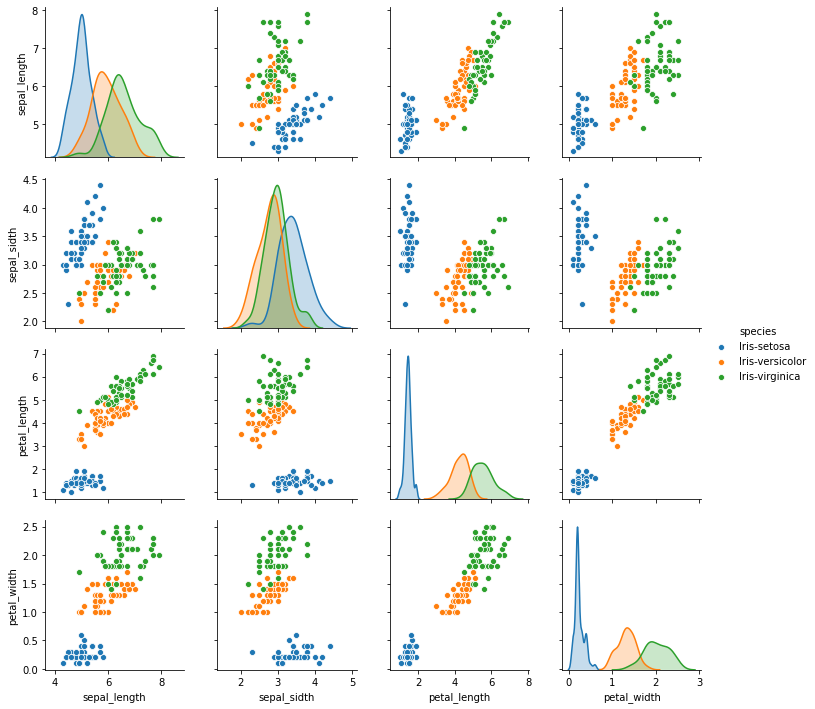

Epoch 1/50
150/150 [==============================] - 0s 550us/step - loss: 1.3259 - accuracy: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 547us/step - loss: 0.8409 - accuracy: 0.6333
Epoch 3/50
150/150 [==============================] - 0s 543us/step - loss: 0.7110 - accuracy: 0.7267
Epoch 4/50
150/150 [==============================] - 0s 536us/step - loss: 0.6229 - accuracy: 0.6867
Epoch 5/50
150/150 [==============================] - 0s 522us/step - loss: 0.5542 - accuracy: 0.7933
Epoch 6/50
150/150 [==============================] - 0s 530us/step - loss: 0.4988 - accuracy: 0.9067
Epoch 7/50
150/150 [==============================] - 0s 539us/step - loss: 0.4562 - accuracy: 0.9133
Epoch 8/50
150/150 [==============================] - 0s 540us/step - loss: 0.4287 - accuracy: 0.9067
Epoch 9/50
150/150 [==============================] - 0s 549us/step - loss: 0.4006 - accuracy: 0.9267
Epoch 10/50
150/150 [==============================] - 0s 532us/step - loss: 0.377

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 

# callbacks # 시스템이 call 하는 함수 > 이벤트가 벌어지면 실행
# accuracy 가 나빠지는 방향으로 변화가 일어 날때 중지
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping


np.random.seed(3)
tf.random.set_seed(3)


df = pd.read_csv('./dataset/iris.csv', names=["sepal_length",'sepal_sidth','petal_length',"petal_width", "species"])

sns.pairplot(df, hue='species')
plt.show()

dataset = df.values
X =dataset[:,0:4].astype(float)
Y =dataset[:,4]

e= LabelEncoder()
e.fit(Y) #범주형데이터
Y = e.transform(Y) # 원래 데이터를 변형 > 0,1,2,3

Y_encoded = tf.keras.utils.to_categorical(Y) # one hot encoding 

model = Sequential()

# 독립변수 (4 x 16) + 16 > 데이터간의 간격을 넓힌다
model.add(Dense(16, input_dim= 4 , activation='relu'))
# (? x 16)  16 x 3  > ? x 3 => one hot encoding
model.add(Dense(3, activation='softmax')) # 확률값으로 변경

# 모델 컴파일 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 비용값 , rmsprop + momentum

# 모델실행 

history = model.fit(X,Y_encoded, epochs=50 , batch_size = 1) # 50 x 150 

# 결과출력 
print('\n Accuracy: %.4f' % (model.evaluate(X,Y_encoded)[1])) 
print('\n loss : %.4f' % (model.evaluate(X,Y_encoded)[0]))






In [ ]:
# 문제 
- 열별 데이터 정보를 출력하시오
- species 를 기준으로 각열의 평균을 출력하시오

In [12]:
df.describe()
df.groupby(['species']).mean()

,sepal_length,sepal_sidth,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [13]:
df.head()

,sepal_length,sepal_sidth,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


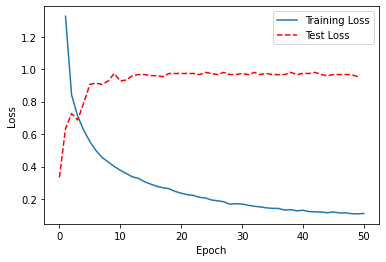

In [22]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
epoch_count = range(1, len(training_loss) + 1 )
plt.plot(epoch_count, training_loss,training_accuracy , 'r--')
plt.legend(['Training Loss' , 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [35]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder

import pandas as pd

import numpy

import tensorflow as tf

numpy.random.seed(3)

tf.random.set_seed(3)

df = pd.read_csv('./dataset/sonar.csv', header=None)

dataset = df.values

X = dataset[:, 0:60] # 0 ~ 59 독립변수

import numpy as np

X = np.asarray(X).astype(np.float32)

Y_obj = dataset[:,60]

e = LabelEncoder()

e.fit(Y_obj)

Y = e.transform(Y_obj)
# train data 에 과하게 적합 되었을 때
 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(

X, Y, test_size=0.3, random_state=3)

 

model = Sequential()

model.add(Dense(24, input_dim=60, activation='relu')) # 60 * 24 + 24

model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',

             optimizer='adam',

             metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=200, batch_size=5)

from keras.models import load_model

model.save('my_model.h5')
del model
model = load_model('my_model.h5')

print('\n accuracy : %.4f' % (model.evaluate(X_test,Y_test)[1]))





Epoch 1/200
29/29 [==============================] - 0s 585us/step - loss: 0.2468 - accuracy: 0.5586
Epoch 2/200
29/29 [==============================] - 0s 570us/step - loss: 0.2330 - accuracy: 0.5724
Epoch 3/200
29/29 [==============================] - 0s 608us/step - loss: 0.2242 - accuracy: 0.6414
Epoch 4/200
29/29 [==============================] - 0s 580us/step - loss: 0.2174 - accuracy: 0.7034
Epoch 5/200
29/29 [==============================] - 0s 622us/step - loss: 0.2126 - accuracy: 0.6828
Epoch 6/200
29/29 [==============================] - 0s 633us/step - loss: 0.2059 - accuracy: 0.7034
Epoch 7/200
29/29 [==============================] - 0s 627us/step - loss: 0.1925 - accuracy: 0.7310
Epoch 8/200
29/29 [==============================] - 0s 602us/step - loss: 0.1866 - accuracy: 0.7517
Epoch 9/200
29/29 [==============================] - 0s 620us/step - loss: 0.1810 - accuracy: 0.7310
Epoch 10/200
29/29 [==============================] - 0s 632us/step - loss: 0.1731 - accura

29/29 [==============================] - 0s 711us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 161/200
29/29 [==============================] - 0s 695us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 162/200
29/29 [==============================] - 0s 676us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 163/200
29/29 [==============================] - 0s 694us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 164/200
29/29 [==============================] - 0s 697us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 165/200
29/29 [==============================] - 0s 675us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 166/200
29/29 [==============================] - 0s 643us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 167/200
29/29 [==============================] - 0s 648us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 168/200
29/29 [==============================] - 0s 701us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 169/200
29/29 [==============================] - 0s 643us/step - loss: 0.0011 - a

In [27]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [36]:
# Bias - variance trade off 

In [40]:
from sklearn.model_selection import StratifiedKFold
n_fold = 10 
# 층화 kfold : 한쪽으로 쏠림이 없는 데이터 만들기
skf = StratifiedKFold(n_splits = n_fold , shuffle =True, random_state = 3)
accuracy = [] 
for train ,test in skf.split(X,Y):
    
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu')) # 60 * 24 + 24 
    model.add(Dense(10, activation='relu')) # 24 x 10
    model.add(Dense(1, activation='sigmoid')) 

    model.compile(loss='mean_squared_error',

                 optimizer='adam',

                 metrics=['accuracy'])

    history = model.fit(X_train, Y_train, epochs=200, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test],Y[test])[1])
    accuracy.append(k_accuracy)
    
# 결과 출력 
print("\n %.f fold accurccy:" % n_fold,accuracy)

Epoch 1/200
29/29 [==============================] - 0s 580us/step - loss: 0.2513 - accuracy: 0.5310
Epoch 2/200
29/29 [==============================] - 0s 635us/step - loss: 0.2390 - accuracy: 0.5517
Epoch 3/200
29/29 [==============================] - 0s 588us/step - loss: 0.2289 - accuracy: 0.6414
Epoch 4/200
29/29 [==============================] - 0s 678us/step - loss: 0.2221 - accuracy: 0.6897
Epoch 5/200
29/29 [==============================] - 0s 663us/step - loss: 0.2177 - accuracy: 0.6690
Epoch 6/200
29/29 [==============================] - 0s 631us/step - loss: 0.2132 - accuracy: 0.7103
Epoch 7/200
29/29 [==============================] - 0s 652us/step - loss: 0.2019 - accuracy: 0.7241
Epoch 8/200
29/29 [==============================] - 0s 638us/step - loss: 0.1970 - accuracy: 0.7172
Epoch 9/200
29/29 [==============================] - 0s 601us/step - loss: 0.1917 - accuracy: 0.7172
Epoch 10/200
29/29 [==============================] - 0s 636us/step - loss: 0.1838 - accura

29/29 [==============================] - 0s 548us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 158/200
29/29 [==============================] - 0s 350us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 159/200
29/29 [==============================] - 0s 659us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 160/200
29/29 [==============================] - 0s 698us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 161/200
29/29 [==============================] - 0s 686us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 162/200
29/29 [==============================] - 0s 683us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 163/200
29/29 [==============================] - 0s 654us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 164/200
29/29 [==============================] - 0s 670us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 165/200
29/29 [==============================] - 0s 744us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 166/200
29/29 [==============================] - 0s 648us/step - loss: 0.0022 - a

29/29 [==============================] - 0s 694us/step - loss: 0.0198 - accuracy: 1.0000
Epoch 107/200
29/29 [==============================] - 0s 629us/step - loss: 0.0185 - accuracy: 0.9931
Epoch 108/200
29/29 [==============================] - 0s 621us/step - loss: 0.0158 - accuracy: 1.0000
Epoch 109/200
29/29 [==============================] - 0s 613us/step - loss: 0.0139 - accuracy: 1.0000
Epoch 110/200
29/29 [==============================] - 0s 615us/step - loss: 0.0157 - accuracy: 1.0000
Epoch 111/200
29/29 [==============================] - 0s 596us/step - loss: 0.0130 - accuracy: 1.0000
Epoch 112/200
29/29 [==============================] - 0s 703us/step - loss: 0.0119 - accuracy: 1.0000
Epoch 113/200
29/29 [==============================] - 0s 680us/step - loss: 0.0155 - accuracy: 1.0000
Epoch 114/200
29/29 [==============================] - 0s 646us/step - loss: 0.0216 - accuracy: 0.9793
Epoch 115/200
29/29 [==============================] - 0s 632us/step - loss: 0.0135 - a

29/29 [==============================] - 0s 690us/step - loss: 0.0702 - accuracy: 0.9310
Epoch 57/200
29/29 [==============================] - 0s 724us/step - loss: 0.0700 - accuracy: 0.9448
Epoch 58/200
29/29 [==============================] - 0s 654us/step - loss: 0.0661 - accuracy: 0.9448
Epoch 59/200
29/29 [==============================] - 0s 653us/step - loss: 0.0666 - accuracy: 0.9310
Epoch 60/200
29/29 [==============================] - 0s 657us/step - loss: 0.0651 - accuracy: 0.9241
Epoch 61/200
29/29 [==============================] - 0s 681us/step - loss: 0.0687 - accuracy: 0.9310
Epoch 62/200
29/29 [==============================] - 0s 629us/step - loss: 0.0629 - accuracy: 0.9586
Epoch 63/200
29/29 [==============================] - 0s 666us/step - loss: 0.0619 - accuracy: 0.9448
Epoch 64/200
29/29 [==============================] - 0s 663us/step - loss: 0.0593 - accuracy: 0.9379
Epoch 65/200
29/29 [==============================] - 0s 688us/step - loss: 0.0623 - accuracy: 

29/29 [==============================] - 0s 682us/step - loss: 0.0087 - accuracy: 1.0000
Epoch 137/200
29/29 [==============================] - 0s 651us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 138/200
29/29 [==============================] - 0s 640us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 139/200
29/29 [==============================] - 0s 639us/step - loss: 0.0110 - accuracy: 1.0000
Epoch 140/200
29/29 [==============================] - 0s 620us/step - loss: 0.0095 - accuracy: 1.0000
Epoch 141/200
29/29 [==============================] - 0s 619us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 142/200
29/29 [==============================] - 0s 632us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 143/200
29/29 [==============================] - 0s 680us/step - loss: 0.0087 - accuracy: 1.0000
Epoch 144/200
29/29 [==============================] - 0s 665us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 145/200
29/29 [==============================] - 0s 668us/step - loss: 0.0078 - a

29/29 [==============================] - 0s 722us/step - loss: 0.0465 - accuracy: 0.9517
Epoch 88/200
29/29 [==============================] - 0s 619us/step - loss: 0.0445 - accuracy: 0.9793
Epoch 89/200
29/29 [==============================] - 0s 619us/step - loss: 0.0432 - accuracy: 0.9724
Epoch 90/200
29/29 [==============================] - 0s 619us/step - loss: 0.0434 - accuracy: 0.9793
Epoch 91/200
29/29 [==============================] - 0s 585us/step - loss: 0.0428 - accuracy: 0.9586
Epoch 92/200
29/29 [==============================] - 0s 653us/step - loss: 0.0442 - accuracy: 0.9517
Epoch 93/200
29/29 [==============================] - 0s 653us/step - loss: 0.0389 - accuracy: 0.9793
Epoch 94/200
29/29 [==============================] - 0s 653us/step - loss: 0.0423 - accuracy: 0.9655
Epoch 95/200
29/29 [==============================] - 0s 653us/step - loss: 0.0412 - accuracy: 0.9724
Epoch 96/200
29/29 [==============================] - 0s 584us/step - loss: 0.0442 - accuracy: 

29/29 [==============================] - 0s 684us/step - loss: 0.0988 - accuracy: 0.8897
Epoch 36/200
29/29 [==============================] - 0s 667us/step - loss: 0.1008 - accuracy: 0.8828
Epoch 37/200
29/29 [==============================] - 0s 661us/step - loss: 0.0976 - accuracy: 0.9034
Epoch 38/200
29/29 [==============================] - 0s 710us/step - loss: 0.1001 - accuracy: 0.8828
Epoch 39/200
29/29 [==============================] - 0s 653us/step - loss: 0.0924 - accuracy: 0.9034
Epoch 40/200
29/29 [==============================] - 0s 708us/step - loss: 0.0898 - accuracy: 0.9034
Epoch 41/200
29/29 [==============================] - 0s 698us/step - loss: 0.0899 - accuracy: 0.9034
Epoch 42/200
29/29 [==============================] - 0s 723us/step - loss: 0.0851 - accuracy: 0.9103
Epoch 43/200
29/29 [==============================] - 0s 648us/step - loss: 0.0831 - accuracy: 0.9241
Epoch 44/200
29/29 [==============================] - 0s 746us/step - loss: 0.0818 - accuracy: 

29/29 [==============================] - 0s 642us/step - loss: 8.4363e-04 - accuracy: 1.0000
Epoch 195/200
29/29 [==============================] - 0s 631us/step - loss: 8.3824e-04 - accuracy: 1.0000
Epoch 196/200
29/29 [==============================] - 0s 660us/step - loss: 7.8174e-04 - accuracy: 1.0000
Epoch 197/200
29/29 [==============================] - 0s 655us/step - loss: 7.4838e-04 - accuracy: 1.0000
Epoch 198/200
29/29 [==============================] - 0s 619us/step - loss: 7.7418e-04 - accuracy: 1.0000
Epoch 199/200
29/29 [==============================] - 0s 654us/step - loss: 7.6283e-04 - accuracy: 1.0000
Epoch 200/200
1/1 [==============================] - 0s 605us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1/200
29/29 [==============================] - 0s 603us/step - loss: 0.2514 - accuracy: 0.5310
Epoch 2/200
29/29 [==============================] - 0s 631us/step - loss: 0.2417 - accuracy: 0.5310
Epoch 3/200
29/29 [==============================] - 0s 544us/step - 

29/29 [==============================] - 0s 666us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 144/200
29/29 [==============================] - 0s 668us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 145/200
29/29 [==============================] - 0s 710us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 146/200
29/29 [==============================] - 0s 608us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 147/200
29/29 [==============================] - 0s 721us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 148/200
29/29 [==============================] - 0s 639us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 149/200
29/29 [==============================] - 0s 650us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 150/200
29/29 [==============================] - 0s 681us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 151/200
29/29 [==============================] - 0s 646us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 152/200
29/29 [==============================] - 0s 724us/step - loss: 0.0034 - a

29/29 [==============================] - 0s 534us/step - loss: 0.1531 - accuracy: 0.7793
Epoch 15/200
29/29 [==============================] - 0s 505us/step - loss: 0.1484 - accuracy: 0.8000
Epoch 16/200
29/29 [==============================] - 0s 450us/step - loss: 0.1489 - accuracy: 0.7793
Epoch 17/200
29/29 [==============================] - 0s 567us/step - loss: 0.1414 - accuracy: 0.7931
Epoch 18/200
29/29 [==============================] - 0s 651us/step - loss: 0.1401 - accuracy: 0.8138
Epoch 19/200
29/29 [==============================] - 0s 626us/step - loss: 0.1381 - accuracy: 0.8000
Epoch 20/200
29/29 [==============================] - 0s 645us/step - loss: 0.1363 - accuracy: 0.8138
Epoch 21/200
29/29 [==============================] - 0s 653us/step - loss: 0.1331 - accuracy: 0.8207
Epoch 22/200
29/29 [==============================] - 0s 707us/step - loss: 0.1340 - accuracy: 0.8345
Epoch 23/200
29/29 [==============================] - 0s 678us/step - loss: 0.1445 - accuracy: 

29/29 [==============================] - 0s 655us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 174/200
29/29 [==============================] - 0s 607us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 175/200
29/29 [==============================] - 0s 644us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 176/200
29/29 [==============================] - 0s 679us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 177/200
29/29 [==============================] - 0s 625us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 178/200
29/29 [==============================] - 0s 688us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 179/200
29/29 [==============================] - 0s 661us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 180/200
29/29 [==============================] - 0s 662us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 181/200
29/29 [==============================] - 0s 635us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 182/200
29/29 [==============================] - 0s 671us/step - loss: 0.0020 - a

Epoch 45/200
29/29 [==============================] - 0s 660us/step - loss: 0.0821 - accuracy: 0.9241
Epoch 46/200
29/29 [==============================] - 0s 623us/step - loss: 0.0802 - accuracy: 0.9103
Epoch 47/200
29/29 [==============================] - 0s 550us/step - loss: 0.0769 - accuracy: 0.9172
Epoch 48/200
29/29 [==============================] - 0s 481us/step - loss: 0.0792 - accuracy: 0.9103
Epoch 49/200
29/29 [==============================] - 0s 488us/step - loss: 0.0722 - accuracy: 0.9241
Epoch 50/200
29/29 [==============================] - 0s 498us/step - loss: 0.0723 - accuracy: 0.9241
Epoch 51/200
29/29 [==============================] - 0s 574us/step - loss: 0.0740 - accuracy: 0.9103
Epoch 52/200
29/29 [==============================] - 0s 692us/step - loss: 0.0713 - accuracy: 0.9172
Epoch 53/200
29/29 [==============================] - 0s 653us/step - loss: 0.0724 - accuracy: 0.9172
Epoch 54/200
29/29 [==============================] - 0s 661us/step - loss: 0.0652

29/29 [==============================] - 0s 608us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 126/200
29/29 [==============================] - 0s 672us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 127/200
29/29 [==============================] - 0s 636us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 128/200
29/29 [==============================] - 0s 614us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 129/200
29/29 [==============================] - 0s 633us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 130/200
29/29 [==============================] - 0s 686us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 131/200
29/29 [==============================] - 0s 710us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 132/200
29/29 [==============================] - 0s 669us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 133/200
29/29 [==============================] - 0s 675us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 134/200
29/29 [==============================] - 0s 752us/step - loss: 0.0028 - a

1/1 [==============================] - 0s 1000us/step - loss: 0.0407 - accuracy: 0.9500
Epoch 1/200
29/29 [==============================] - 0s 648us/step - loss: 0.2731 - accuracy: 0.4621
Epoch 2/200
29/29 [==============================] - 0s 652us/step - loss: 0.2449 - accuracy: 0.5310
Epoch 3/200
29/29 [==============================] - 0s 590us/step - loss: 0.2374 - accuracy: 0.5724
Epoch 4/200
29/29 [==============================] - 0s 689us/step - loss: 0.2301 - accuracy: 0.6690
Epoch 5/200
29/29 [==============================] - 0s 694us/step - loss: 0.2250 - accuracy: 0.6759
Epoch 6/200
29/29 [==============================] - 0s 619us/step - loss: 0.2222 - accuracy: 0.6414
Epoch 7/200
29/29 [==============================] - 0s 642us/step - loss: 0.2113 - accuracy: 0.7172
Epoch 8/200
29/29 [==============================] - 0s 652us/step - loss: 0.2049 - accuracy: 0.7862
Epoch 9/200
29/29 [==============================] - 0s 657us/step - loss: 0.2006 - accuracy: 0.7379
Epo

29/29 [==============================] - 0s 707us/step - loss: 0.0443 - accuracy: 0.9586
Epoch 79/200
29/29 [==============================] - 0s 689us/step - loss: 0.0463 - accuracy: 0.9586
Epoch 80/200
29/29 [==============================] - 0s 640us/step - loss: 0.0447 - accuracy: 0.9724
Epoch 81/200
29/29 [==============================] - 0s 650us/step - loss: 0.0433 - accuracy: 0.9586
Epoch 82/200
29/29 [==============================] - 0s 488us/step - loss: 0.0401 - accuracy: 0.9793
Epoch 83/200
29/29 [==============================] - 0s 952us/step - loss: 0.0479 - accuracy: 0.9586
Epoch 84/200
29/29 [==============================] - 0s 684us/step - loss: 0.0371 - accuracy: 0.9724
Epoch 85/200
29/29 [==============================] - 0s 620us/step - loss: 0.0353 - accuracy: 0.9724
Epoch 86/200
29/29 [==============================] - 0s 687us/step - loss: 0.0371 - accuracy: 0.9793
Epoch 87/200
29/29 [==============================] - 0s 670us/step - loss: 0.0346 - accuracy: 

29/29 [==============================] - 0s 666us/step - loss: 0.1272 - accuracy: 0.8483
Epoch 27/200
29/29 [==============================] - 0s 632us/step - loss: 0.1243 - accuracy: 0.8483
Epoch 28/200
29/29 [==============================] - 0s 641us/step - loss: 0.1294 - accuracy: 0.8345
Epoch 29/200
29/29 [==============================] - 0s 637us/step - loss: 0.1204 - accuracy: 0.8552
Epoch 30/200
29/29 [==============================] - 0s 639us/step - loss: 0.1223 - accuracy: 0.8414
Epoch 31/200
29/29 [==============================] - 0s 643us/step - loss: 0.1185 - accuracy: 0.8483
Epoch 32/200
29/29 [==============================] - 0s 647us/step - loss: 0.1160 - accuracy: 0.8552
Epoch 33/200
29/29 [==============================] - 0s 653us/step - loss: 0.1134 - accuracy: 0.8690
Epoch 34/200
29/29 [==============================] - 0s 629us/step - loss: 0.1153 - accuracy: 0.8483
Epoch 35/200
29/29 [==============================] - 0s 660us/step - loss: 0.1093 - accuracy: 

29/29 [==============================] - 0s 702us/step - loss: 0.0185 - accuracy: 0.9862
Epoch 186/200
29/29 [==============================] - 0s 674us/step - loss: 0.0180 - accuracy: 0.9862
Epoch 187/200
29/29 [==============================] - 0s 661us/step - loss: 0.0180 - accuracy: 0.9862
Epoch 188/200
29/29 [==============================] - 0s 665us/step - loss: 0.0172 - accuracy: 0.9862
Epoch 189/200
29/29 [==============================] - 0s 683us/step - loss: 0.0175 - accuracy: 0.9862
Epoch 190/200
29/29 [==============================] - 0s 698us/step - loss: 0.0167 - accuracy: 0.9862
Epoch 191/200
29/29 [==============================] - 0s 578us/step - loss: 0.0164 - accuracy: 0.9862
Epoch 192/200
29/29 [==============================] - 0s 662us/step - loss: 0.0242 - accuracy: 0.9862
Epoch 193/200
29/29 [==============================] - 0s 761us/step - loss: 0.0181 - accuracy: 0.9862
Epoch 194/200
29/29 [==============================] - 0s 615us/step - loss: 0.0197 - a

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 

# callbacks # 시스템이 call 하는 함수 > 이벤트가 벌어지면 실행
# accuracy 가 나빠지는 방향으로 변화가 일어 날때 중지
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping


seed = 0 
numpy.random.seed(seed)
tf.random.set_seed(3)
df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df = df_pre.sample(frac=1) # sampling 100 frac =1 전부다가져오기 0.7  / 70프로만 가져오기

In [62]:
df_pre.shape

(6497, 13)

In [63]:
df_pre.head(2)
print(df[12].unique())

[0 1]


In [79]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:, 12]

print(X[3],Y[3])
model = Sequential()
model.add(Dense(30, input_dim=12 ,activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu')) # 마지막 sigmoid 분류 0~ 1 확률값으로 매핑
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 : 모델 구조 + 가중치
#모델 최적화
import os 
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5" # 최적의 모델을 저장할 위치
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 100)
history =  model.fit(X,Y ,validation_split=0.2,epochs = 200 , batch_size=200 , callbacks=[checkpointer, early_stopping_callback])
print("\n Accuracy: %.4f" % (model.evaluate(X,Y)[1]))

[7.600e+00 6.700e-01 1.400e-01 1.500e+00 7.400e-02 2.500e+01 1.680e+02
 9.937e-01 3.050e+00 5.100e-01 9.300e+00 5.000e+00] 0.0
Epoch 1/200
 1/26 [>.............................] - ETA: 0s - loss: 0.6469 - accuracy: 0.7850
Epoch 00001: val_loss improved from inf to 0.31924, saving model to ./model\01-0.3192.hdf5
26/26 [==============================] - 0s 4ms/step - loss: 0.4565 - accuracy: 0.7880 - val_loss: 0.3192 - val_accuracy: 0.8400
Epoch 2/200
 1/26 [>.............................] - ETA: 0s - loss: 0.2845 - accuracy: 0.8750
Epoch 00002: val_loss improved from 0.31924 to 0.22752, saving model to ./model\02-0.2275.hdf5
26/26 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8876 - val_loss: 0.2275 - val_accuracy: 0.9231
Epoch 3/200
 1/26 [>.............................] - ETA: 0s - loss: 0.2758 - accuracy: 0.8900
Epoch 00003: val_loss improved from 0.22752 to 0.20518, saving model to ./model\03-0.2052.hdf5
26/26 [==============================] - 0s 2ms/s

Epoch 54/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0595 - accuracy: 0.9750
Epoch 00054: val_loss improved from 0.06946 to 0.06735, saving model to ./model\54-0.0673.hdf5
26/26 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9763 - val_loss: 0.0673 - val_accuracy: 0.9800
Epoch 55/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0844 - accuracy: 0.9800
Epoch 00055: val_loss did not improve from 0.06735
26/26 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 0.9759 - val_loss: 0.0689 - val_accuracy: 0.9792
Epoch 56/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0509 - accuracy: 0.9800
Epoch 00056: val_loss improved from 0.06735 to 0.06643, saving model to ./model\56-0.0664.hdf5
26/26 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9771 - val_loss: 0.0664 - val_accuracy: 0.9808
Epoch 57/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0649 - accur

26/26 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9813 - val_loss: 0.0594 - val_accuracy: 0.9831
Epoch 83/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0360 - accuracy: 0.9850
Epoch 00083: val_loss improved from 0.05944 to 0.05844, saving model to ./model\83-0.0584.hdf5
26/26 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9784 - val_loss: 0.0584 - val_accuracy: 0.9831
Epoch 84/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0800 - accuracy: 0.9750
Epoch 00084: val_loss did not improve from 0.05844
26/26 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9800 - val_loss: 0.0586 - val_accuracy: 0.9838
Epoch 85/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0410 - accuracy: 0.9900
Epoch 00085: val_loss did not improve from 0.05844
26/26 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9810 - val_loss: 0.0590 - val_accuracy: 0.9831

Epoch 140/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0380 - accuracy: 0.9950
Epoch 00140: val_loss did not improve from 0.05279
26/26 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9863 - val_loss: 0.0538 - val_accuracy: 0.9854
Epoch 141/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0341 - accuracy: 0.9900
Epoch 00141: val_loss did not improve from 0.05279
26/26 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9840 - val_loss: 0.0551 - val_accuracy: 0.9885
Epoch 142/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0871 - accuracy: 0.9750
Epoch 00142: val_loss improved from 0.05279 to 0.05259, saving model to ./model\142-0.0526.hdf5
26/26 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9829 - val_loss: 0.0526 - val_accuracy: 0.9869
Epoch 143/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0278 - accuracy: 0.9950
Epoch 00143: val_loss did n

Epoch 199/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0444 - accuracy: 0.9850
Epoch 00199: val_loss did not improve from 0.05080
26/26 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.9858 - val_loss: 0.0520 - val_accuracy: 0.9877
Epoch 200/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0264 - accuracy: 0.9850
Epoch 00200: val_loss did not improve from 0.05080
204/204 [==============================] - 0s 583us/step - loss: 0.0468 - accuracy: 0.9866

 Accuracy: 0.9866


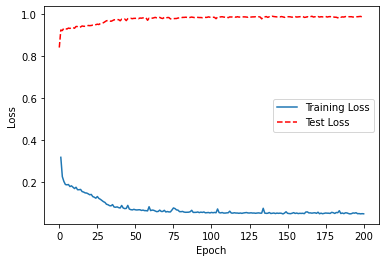

In [80]:
training_loss = history.history['val_loss']
training_accuracy = history.history['val_accuracy']
epoch_count = range(1, len(training_loss) + 1 )
plt.plot(epoch_count, training_loss,training_accuracy , 'r--')
plt.legend(['Training Loss' , 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [77]:
# 모델의 구조
model.summary()
# 12 x 30 + 30 
# 30 x 12 + 12 
# 12 x 8 + 8 
# 8 x 1 + 1 

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 30)                390       
_________________________________________________________________
dense_159 (Dense)            (None, 12)                372       
_________________________________________________________________
dense_160 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [118]:
# 평균집값 예측 -> 연속적 수치 예측
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy 
import pandas as pd 
import tensorflow as tf 
seed = 0 

numpy.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv("./dataset/housing.csv" , delim_whitespace=True, header =None)
dataset = df.values

X = dataset[:,0:13]
Y = dataset[:,13]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size = 0.3 , random_state = seed)




In [119]:
model = Sequential()
model.add(Dense(30, input_dim = 13, activation='relu'))  # 여백을 확보 - 고차원으로 확대
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss = 'mean_squared_error' , optimizer='adam' ,metrics=['accuracy']) # 연속형 수치의 예측 : 비선형회귀
model.fit(X_train,Y_train, epochs= 200 ,batch_size = 10, verbose=0)
Y_prediction = model.predict(X_test).flatten()

for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격 : {:.3f}, 예상가격 :{:.3f}".format(label,prediction))

실제가격 : 22.600, 예상가격 :0.000
실제가격 : 50.000, 예상가격 :0.000
실제가격 : 23.000, 예상가격 :0.000
실제가격 : 8.300, 예상가격 :0.000
실제가격 : 21.200, 예상가격 :0.000
실제가격 : 19.900, 예상가격 :0.000
실제가격 : 20.600, 예상가격 :0.000
실제가격 : 18.700, 예상가격 :0.000
실제가격 : 16.100, 예상가격 :0.000
실제가격 : 18.600, 예상가격 :0.000


# Parameter tuning 
- KerasRegressor 를 통해서 scikits 의 GridsearchCV를 사용 
- keras의 모델이 함수로 wrapper 되어져야함
- GridsearchCV 에서 파라미터 keras 의 모델로 전달해 튜닝

In [142]:
import numpy 
import pandas 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 케라스 + scikits 연결 : KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [169]:
dataframe = pandas.read_csv("./dataset/housing.csv", delim_whitespace=True, header =None)

dataset = dataframe.values
X =dataset[:,0:13]
Y =dataset[:,13]
def baseline_model(optimizer='adam'): # keras 모델을 함수화
    model = Sequential()
    model.add(Dense(13, input_dim = 13 , kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer ='normal'))
    model.compile(loss = 'mean_squared_error' , optimizer= optimizer) # 속도조절 + momentum
    return model
seed = 7
numpy.random.seed(seed)
# scikits 에서는 모델을 estimator , tf 에서는 신경망으로 ML을 만들고 estimator
# keras를 > scikits 의 함수들을 쓸수 있도록 해주는 작업
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100 , batch_size=5 ,verbose=0)
kfold = KFold(n_splits=10, random_state=seed)

results = cross_val_score(estimator,X,Y,cv=kfold)
print("결과 : %2f(%.2f) MSE" % (results.mean(),results.std()))

결과 : -119.50 (89.83) MSE


In [166]:
# 파이프라인 + gridsearchcv

In [170]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp',KerasRegressor(build_fn=baseline_model, epochs=50 , batch_size = 5, verbose=0)))
print(estimators)
pipeline = Pipeline(estimators) # 데이터 정규화및 kerasRegressor 작업을 묶어줌
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X,Y, cv=kfold)

print("표준화된 결과 : %.2f (%.2f) MSE" % (results.mean(),results.std()))
# scikits(머신러닝패키지) > kerasRegressor > keras(tesnorflow 문법)

pipeline.fit(X,Y)
print(X[0:5])
pipeline.predict(X[0:5])
             

[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001BB833D0EC8>)]
표준화된 결과 : -29.22 (26.77) MSE
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


array([30.027094, 25.186655, 33.130444, 32.832798, 33.322002],
      dtype=float32)

In [172]:
optimizer = ['RMSprop', 'Adagrad', 'Adam', 'Nadam']

param_grid = dict(mlp__optimizer=optimizer) # mlp_optimzer가 변수는 아님 달고 파이프 라인으로

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid,

                   n_jobs=-1)

grid_result = grid.fit(X,Y)

print('best: %f using %s' % (grid_result.best_score_,

                            grid_result.best_params_))

C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best: -204.500007 using {'mlp__optimizer': 'Nadam'}


# 문제 ) activation 의 parameter tuning 을 하시오 

In [225]:
dataframe = pandas.read_csv("./dataset/housing.csv", delim_whitespace=True, header =None)

dataset = dataframe.values
X =dataset[:,0:13]
Y =dataset[:,13]
def baseline_model(activation='elu' ,optimizer= 'Nadam'): # keras 모델을 함수화
    model = Sequential()
    model.add(Dense(13, input_dim = 13 , kernel_initializer='normal', activation=activation))
    model.add(Dense(1, kernel_initializer ='normal'))
    model.compile(loss = 'mean_squared_error' , optimizer= optimizer) # 속도조절 + momentum
    return model

def larger_model(optimizer='adam', activation='relu'): # keras 모델을 함수화
    model = Sequential()
    model.add(Dense(13, input_dim = 13 , kernel_initializer='normal', activation=activation))
    model.add(Dense(6, activation= activation,kernel_initializer='normal'))
    model.add(Dense(3, activation= activation, kernel_initializer='normal'))
    model.add(Dense(1, kernel_initializer ='normal'))
    model.compile(loss = 'mean_squared_error' , optimizer= optimizer) # 속도조절 + momentum
    return model

def wider_model(optimizer='adam', activation='elu'): # keras 모델을 함수화
    model = Sequential()
    model.add(Dense(20, input_dim = 13 , kernel_initializer='normal', activation=activation))
    model.add(Dense(1, kernel_initializer ='normal'))
    model.compile(loss = 'mean_squared_error' , optimizer= optimizer) # 속도조절 + momentum
    return model

def wider1_model(optimizer='adam', activation='relu'): # keras 모델을 함수화
    model = Sequential()
    model.add(Dense(20, input_dim = 13 , kernel_initializer='normal', activation=activation))
    model.add(Dense(1, kernel_initializer ='normal'))
    model.compile(loss = 'mean_squared_error' , optimizer= optimizer) # 속도조절 + momentum
    return model
seed = 7
numpy.random.seed(seed)
# scikits 에서는 모델을 estimator , tf 에서는 신경망으로 ML을 만들고 estimator
# keras를 > scikits 의 함수들을 쓸수 있도록 해주는 작업
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100 , batch_size=5 ,verbose=0)
estimator1 = KerasRegressor(build_fn=larger_model, nb_epoch=100 , batch_size=5 ,verbose=0)
estimator2 = KerasRegressor(build_fn=wider_model, nb_epoch=100 , batch_size=5 ,verbose=0)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator,X,Y,cv=kfold)
results1 = cross_val_score(estimator1,X,Y,cv=kfold)
results2 = cross_val_score(estimator2,X,Y,cv=kfold)
print("결과 : %2f(%.2f) MSE" % (results.mean(),results.std()))
print("결과 : %2f(%.2f) MSE" % (results1.mean(),results.std()))
print("결과 : %2f(%.2f) MSE" % (results2.mean(),results.std()))

결과 : -97.162742(71.01) MSE
결과 : -394.209226(71.01) MSE
결과 : -90.654224(71.01) MSE


In [217]:
# baseline_model 
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp',KerasRegressor(build_fn=baseline_model, epochs=50 , batch_size = 5, verbose=0)))
print(estimators)
pipeline = Pipeline(estimators) # 데이터 정규화및 kerasRegressor 작업을 묶어줌
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X,Y, cv=kfold)

print("표준화된 결과 : %.2f (%.2f) MSE" % (results.mean(),results.std()))
# scikits(머신러닝패키지) > kerasRegressor > keras(tesnorflow 문법)

pipeline.fit(X,Y)
print(X[0:5])
pipeline.predict(X[0:5])
             

[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001BB84FE2E48>)]
표준화된 결과 : -27.33 (38.37) MSE
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


array([27.101479, 23.812962, 32.112972, 29.813847, 30.365288],
      dtype=float32)

In [220]:
# larger_model
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp',KerasRegressor(build_fn=larger_model, epochs=50 , batch_size = 5, verbose=0)))
print(estimators)
pipeline = Pipeline(estimators) # 데이터 정규화및 kerasRegressor 작업을 묶어줌
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X,Y, cv=kfold)

print("표준화된 결과 : %.2f (%.2f) MSE" % (results.mean(),results.std()))
# scikits(머신러닝패키지) > kerasRegressor > keras(tesnorflow 문법)

pipeline.fit(X,Y)
print(X[0:5])
pipeline.predict(X[0:5])

[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001BB95B75C08>)]
표준화된 결과 : -21.94 (24.39) MSE
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


array([28.439049, 23.823671, 33.22274 , 31.598694, 31.43638 ],
      dtype=float32)

In [227]:
# wider_model

numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp',KerasRegressor(build_fn=wider_model, epochs=50 , batch_size = 5, verbose=0)))
print(estimators)
pipeline = Pipeline(estimators) # 데이터 정규화및 kerasRegressor 작업을 묶어줌
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X,Y, cv=kfold)

print("표준화된 결과 : %.2f (%.2f) MSE" % (results.mean(),results.std()))
# scikits(머신러닝패키지) > kerasRegressor > keras(tesnorflow 문법)

pipeline.fit(X,Y)
print(X[0:5])
pipeline.predict(X[0:5])

[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001BB8E6960C8>)]
표준화된 결과 : -26.86 (40.74) MSE
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


array([27.286991, 24.070135, 32.40909 , 29.822447, 30.508184],
      dtype=float32)

In [226]:
# wider_model1

numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp',KerasRegressor(build_fn=wider1_model, epochs=50 , batch_size = 5, verbose=0)))
print(estimators)
pipeline = Pipeline(estimators) # 데이터 정규화및 kerasRegressor 작업을 묶어줌
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X,Y, cv=kfold)

print("표준화된 결과 : %.2f (%.2f) MSE" % (results.mean(),results.std()))
# scikits(머신러닝패키지) > kerasRegressor > keras(tesnorflow 문법)

pipeline.fit(X,Y)
print(X[0:5])
pipeline.predict(X[0:5])

[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001BB83891748>)]
표준화된 결과 : -26.36 (26.03) MSE
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


array([29.37829 , 24.070667, 33.707302, 32.377   , 32.614105],
      dtype=float32)

In [222]:
activation = ['tanh', 'sigmoid', 'relu','elu']
optimizer = ['RMSprop', 'Adagrad', 'Adam', 'Nadam']

param_grid = dict(mlp__activation = activation,mlp__optimizer = optimizer) # mlp_optimzer가 변수는 아님 달고 파이프 라인으로

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid,

                   n_jobs=-1)

grid_result = grid.fit(X,Y)

print('best: %f using %s' % (grid_result.best_score_,

                            grid_result.best_params_))

C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best: -43.820604 using {'mlp__activation': 'elu', 'mlp__optimizer': 'Adam'}


 #  

In [196]:
print(Y[0:5])
grid.predict(X[0:5])

[24.  21.6 34.7 33.4 36.2]


array([26.786348, 24.204178, 32.522175, 29.663662, 30.537216],
      dtype=float32)

In [195]:
kfold = KFold(n_splits=10, random_state = seed)
results = cross_val_score(grid,X,Y,cv=kfold)
print("standardized : %.2f (%.2f) MSE" % (results.mean(),results.std()))

C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be

standardized : -35.30 (36.21) MSE
